# 데이터 분포 분석

이 노트북은 dummy_data_100.json의 주요 필드에 대한 통계와 히스토그램을 생성합니다.

## 분석 대상 필드
- user_group_vector
- session_click_count
- session_total_view_time
- predicted_price
- lead_time
- predicted_quality
- promotion
- action_t
- clicked
- page_view_time_sec
- purchased

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

# 한글 폰트 설정
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

# 그래프 스타일 설정
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (15, 10)

In [ ]:
# 데이터 로드
data_path = Path('../data/raw/dummy_data_100.json')

with open(data_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

print(f"총 트랜지션 수: {len(data)}개")
print(f"샘플 데이터 키: {data[0].keys()}")

총 트랜지션 수: 638개
샘플 데이터 키: dict_keys(['session_id', 'step', 'timestamp', 'state_t', 'action_t', 'reward_ingredients', 'next_state_t_plus_1', 'done'])


In [3]:
# 필드별 데이터 추출
extracted_data = {
    'user_group_vector_0': [],  # high_quality
    'user_group_vector_1': [],  # low_price
    'session_click_count': [],
    'session_total_view_time': [],
    'predicted_price': [],
    'lead_time': [],
    'predicted_quality': [],
    'promotion': [],
    'action_t': [],
    'clicked': [],
    'page_view_time_sec': [],
    'purchased': []
}

for transition in data:
    # user_group_vector
    user_group = transition['state_t']['user_profile']['user_group_vector']
    extracted_data['user_group_vector_0'].append(user_group[0])
    extracted_data['user_group_vector_1'].append(user_group[1])
    
    # session_history
    session_history = transition['state_t']['session_history']
    extracted_data['session_click_count'].append(session_history['session_click_count'])
    extracted_data['session_total_view_time'].append(session_history['session_total_view_time'])
    
    # candidate_item_info
    candidate = transition['state_t']['candidate_item_info']
    extracted_data['predicted_price'].append(candidate['predicted_price'])
    extracted_data['lead_time'].append(candidate['lead_time'])
    extracted_data['predicted_quality'].append(candidate['predicted_quality'])
    extracted_data['promotion'].append(candidate['promotion'])
    
    # action
    extracted_data['action_t'].append(transition['action_t'])
    
    # reward_ingredients
    reward = transition['reward_ingredients']
    extracted_data['clicked'].append(reward['clicked'])
    extracted_data['page_view_time_sec'].append(reward['page_view_time_sec'])
    extracted_data['purchased'].append(reward['purchased'])

print("데이터 추출 완료!")
print(f"추출된 필드: {list(extracted_data.keys())}")

데이터 추출 완료!
추출된 필드: ['user_group_vector_0', 'user_group_vector_1', 'session_click_count', 'session_total_view_time', 'predicted_price', 'lead_time', 'predicted_quality', 'promotion', 'action_t', 'clicked', 'page_view_time_sec', 'purchased']


In [4]:
# 통계 계산 함수
def calculate_statistics(values, field_name):
    """필드의 통계 정보를 계산하고 출력"""
    values_array = np.array(values)
    
    stats = {
        '최소값 (Min)': np.min(values_array),
        '최대값 (Max)': np.max(values_array),
        '평균 (Mean)': np.mean(values_array),
        '중앙값 (Median)': np.median(values_array),
        '표준편차 (Std)': np.std(values_array),
        '1사분위수 (Q1)': np.percentile(values_array, 25),
        '3사분위수 (Q3)': np.percentile(values_array, 75)
    }
    
    print(f"\n{'='*60}")
    print(f"{field_name} 통계")
    print('='*60)
    for stat_name, value in stats.items():
        if isinstance(value, float):
            print(f"{stat_name:20s}: {value:>12.2f}")
        else:
            print(f"{stat_name:20s}: {value:>12}")
    
    return stats

def plot_histogram(values, field_name, stats, bins='auto'):
    """히스토그램 생성"""
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # 히스토그램
    n, bins_edges, patches = ax.hist(values, bins=bins, alpha=0.7, 
                                       color='steelblue', edgecolor='black')
    
    # 통계선 추가
    ax.axvline(stats['평균 (Mean)'], color='red', linestyle='--', 
               linewidth=2, label=f"Mean: {stats['평균 (Mean)']:.2f}")
    ax.axvline(stats['중앙값 (Median)'], color='green', linestyle='--', 
               linewidth=2, label=f"Median: {stats['중앙값 (Median)']:.2f}")
    
    # 레이블 및 제목
    ax.set_xlabel('Value', fontsize=12, fontweight='bold')
    ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')
    ax.set_title(f'{field_name} Distribution', fontsize=14, fontweight='bold', pad=20)
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)
    
    # 통계 정보 텍스트 박스
    stats_text = f"Min: {stats['최소값 (Min)']:.2f}\n"
    stats_text += f"Max: {stats['최대값 (Max)']:.2f}\n"
    stats_text += f"Mean: {stats['평균 (Mean)']:.2f}\n"
    stats_text += f"Median: {stats['중앙값 (Median)']:.2f}\n"
    stats_text += f"Std: {stats['표준편차 (Std)']:.2f}"
    
    ax.text(0.98, 0.98, stats_text, transform=ax.transAxes,
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
            fontsize=10, fontfamily='monospace')
    
    plt.tight_layout()
    return fig

## 1. User Group Vector 분석


user_group_vector[0] (high_quality) 통계
최소값 (Min)           :            0
최대값 (Max)           :            1
평균 (Mean)           :         0.57
중앙값 (Median)        :         1.00
표준편차 (Std)          :         0.49
1사분위수 (Q1)          :         0.00
3사분위수 (Q3)          :         1.00


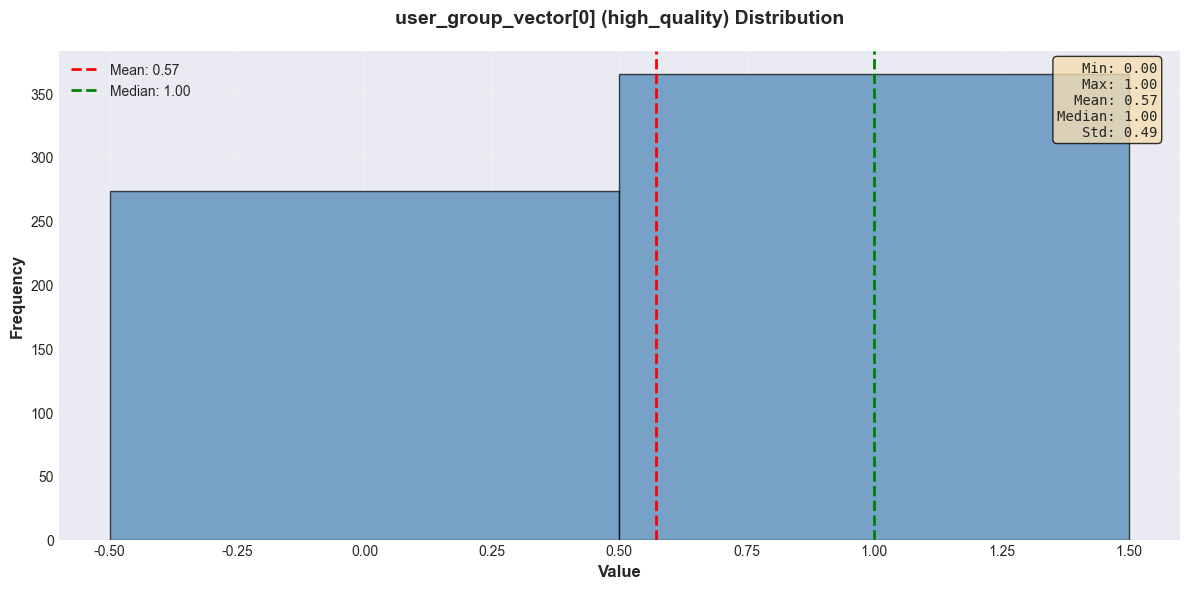


user_group_vector[1] (low_price) 통계
최소값 (Min)           :            0
최대값 (Max)           :            1
평균 (Mean)           :         0.43
중앙값 (Median)        :         0.00
표준편차 (Std)          :         0.49
1사분위수 (Q1)          :         0.00
3사분위수 (Q3)          :         1.00


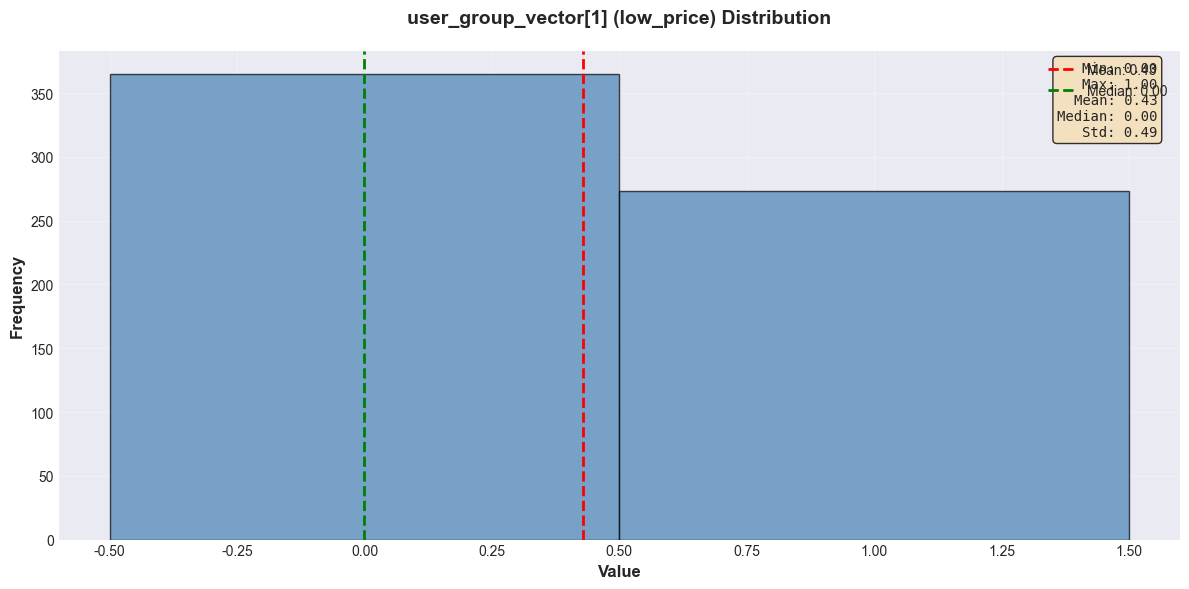

In [5]:
# user_group_vector[0] - high_quality
stats_ugv0 = calculate_statistics(extracted_data['user_group_vector_0'], 
                                   'user_group_vector[0] (high_quality)')
fig1 = plot_histogram(extracted_data['user_group_vector_0'], 
                      'user_group_vector[0] (high_quality)', 
                      stats_ugv0, bins=[-0.5, 0.5, 1.5])
plt.show()

# user_group_vector[1] - low_price
stats_ugv1 = calculate_statistics(extracted_data['user_group_vector_1'], 
                                   'user_group_vector[1] (low_price)')
fig2 = plot_histogram(extracted_data['user_group_vector_1'], 
                      'user_group_vector[1] (low_price)', 
                      stats_ugv1, bins=[-0.5, 0.5, 1.5])
plt.show()

## 2. Session History 분석


session_click_count 통계
최소값 (Min)           :            0
최대값 (Max)           :            7
평균 (Mean)           :         1.86
중앙값 (Median)        :         1.00
표준편차 (Std)          :         1.70
1사분위수 (Q1)          :         0.00
3사분위수 (Q3)          :         3.00


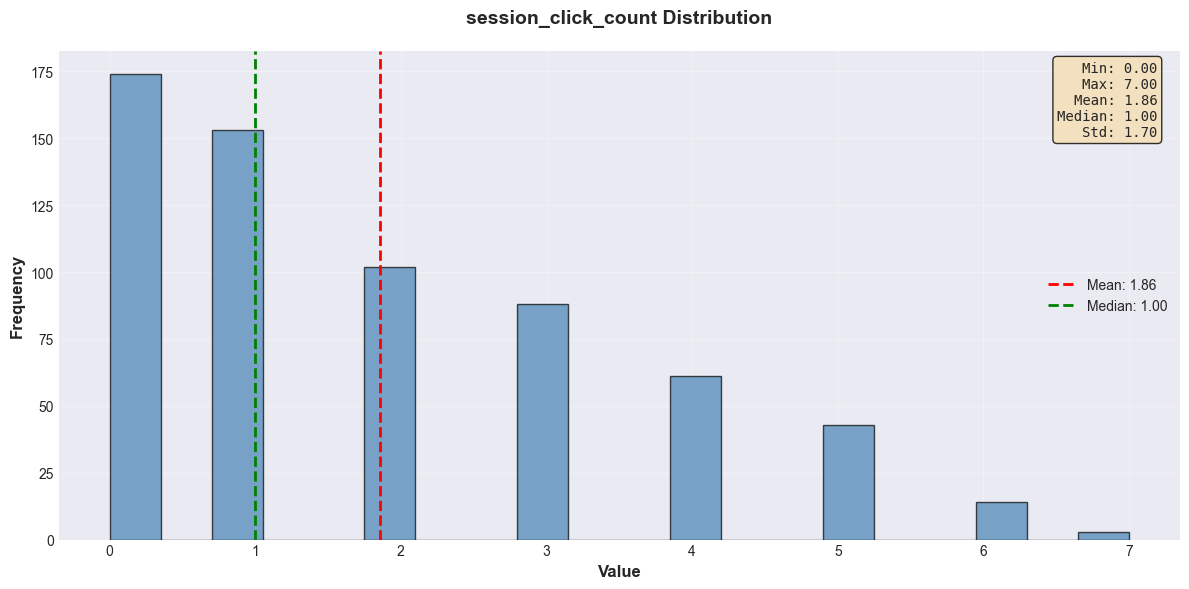

In [6]:
# session_click_count
stats_click = calculate_statistics(extracted_data['session_click_count'], 
                                    'session_click_count')
fig3 = plot_histogram(extracted_data['session_click_count'], 
                      'session_click_count', stats_click, bins=20)
plt.show()


session_total_view_time 통계
최소값 (Min)           :            0
최대값 (Max)           :          561
평균 (Mean)           :       145.28
중앙값 (Median)        :       115.00
표준편차 (Std)          :       133.50
1사분위수 (Q1)          :        20.00
3사분위수 (Q3)          :       229.00


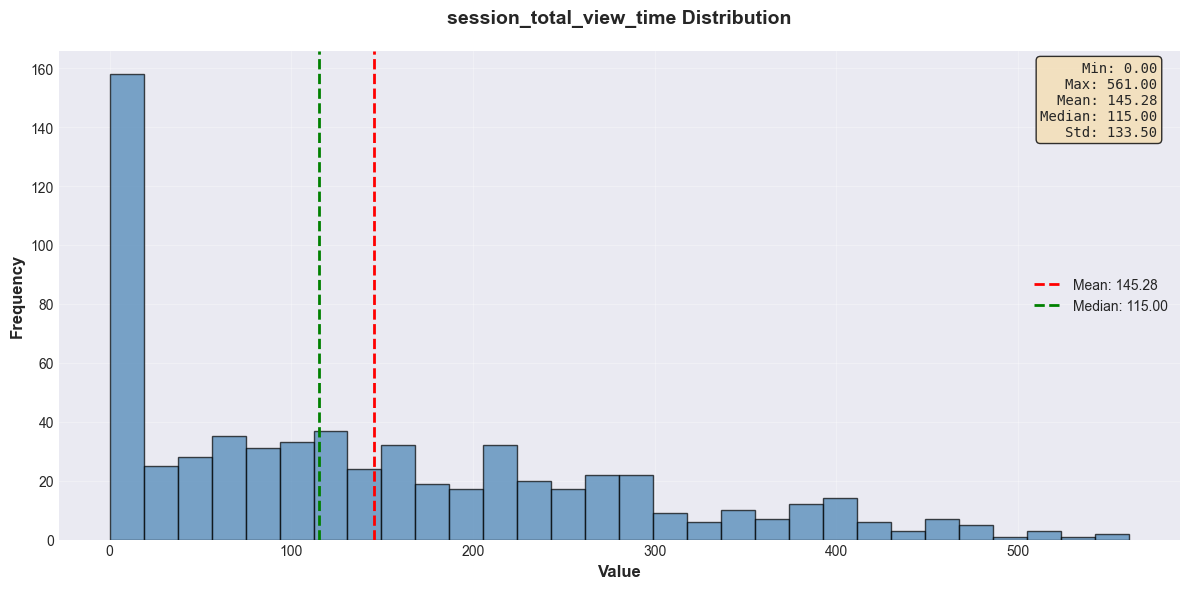

In [7]:
# session_total_view_time
stats_view_time = calculate_statistics(extracted_data['session_total_view_time'], 
                                        'session_total_view_time')
fig4 = plot_histogram(extracted_data['session_total_view_time'], 
                      'session_total_view_time', stats_view_time, bins=30)
plt.show()

## 3. Candidate Item Info 분석


predicted_price 통계
최소값 (Min)           :         7200
최대값 (Max)           :        64000
평균 (Mean)           :     20994.36
중앙값 (Median)        :     18800.00
표준편차 (Std)          :     11252.69
1사분위수 (Q1)          :     12600.00
3사분위수 (Q3)          :     26300.00


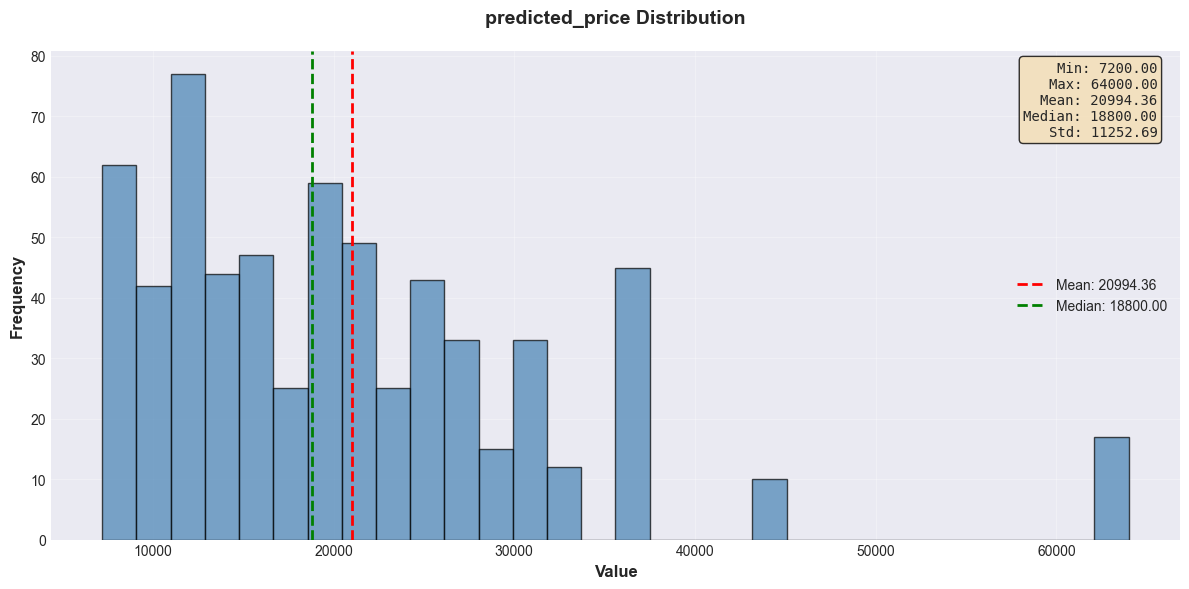

In [8]:
# predicted_price
stats_price = calculate_statistics(extracted_data['predicted_price'], 
                                    'predicted_price')
fig5 = plot_histogram(extracted_data['predicted_price'], 
                      'predicted_price', stats_price, bins=30)
plt.show()


lead_time 통계
최소값 (Min)           :            1
최대값 (Max)           :            5
평균 (Mean)           :         3.06
중앙값 (Median)        :         3.00
표준편차 (Std)          :         1.41
1사분위수 (Q1)          :         2.00
3사분위수 (Q3)          :         4.00


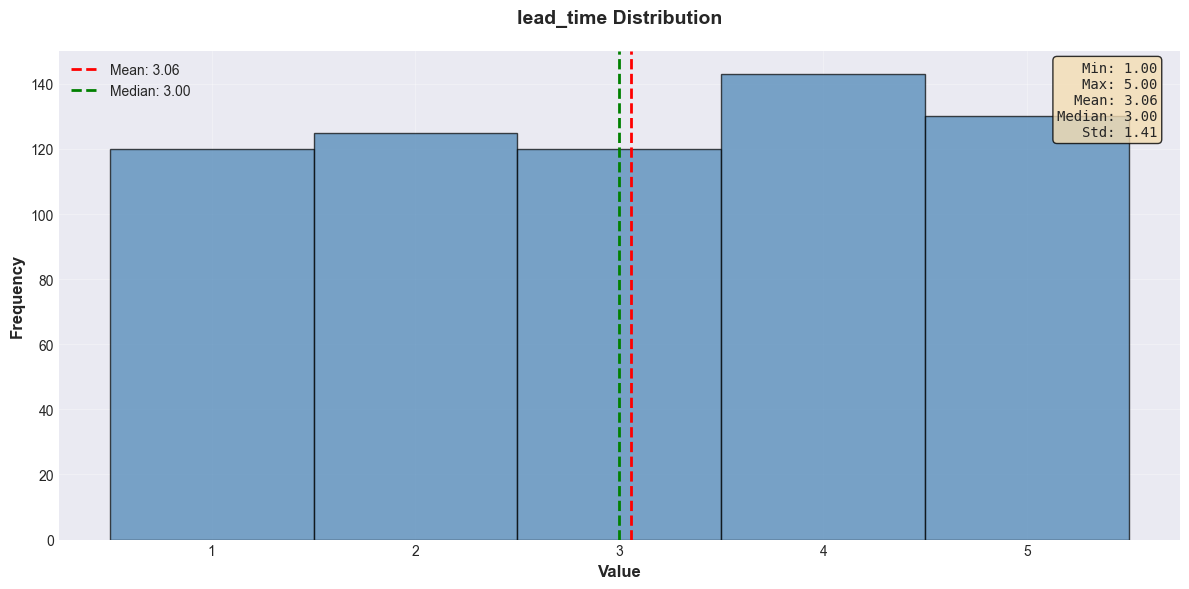

In [9]:
# lead_time
stats_lead = calculate_statistics(extracted_data['lead_time'], 
                                   'lead_time')
fig6 = plot_histogram(extracted_data['lead_time'], 
                      'lead_time', stats_lead, bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5])
plt.show()


predicted_quality 통계
최소값 (Min)           :         0.70
최대값 (Max)           :         0.99
평균 (Mean)           :         0.86
중앙값 (Median)        :         0.86
표준편차 (Std)          :         0.07
1사분위수 (Q1)          :         0.80
3사분위수 (Q3)          :         0.92


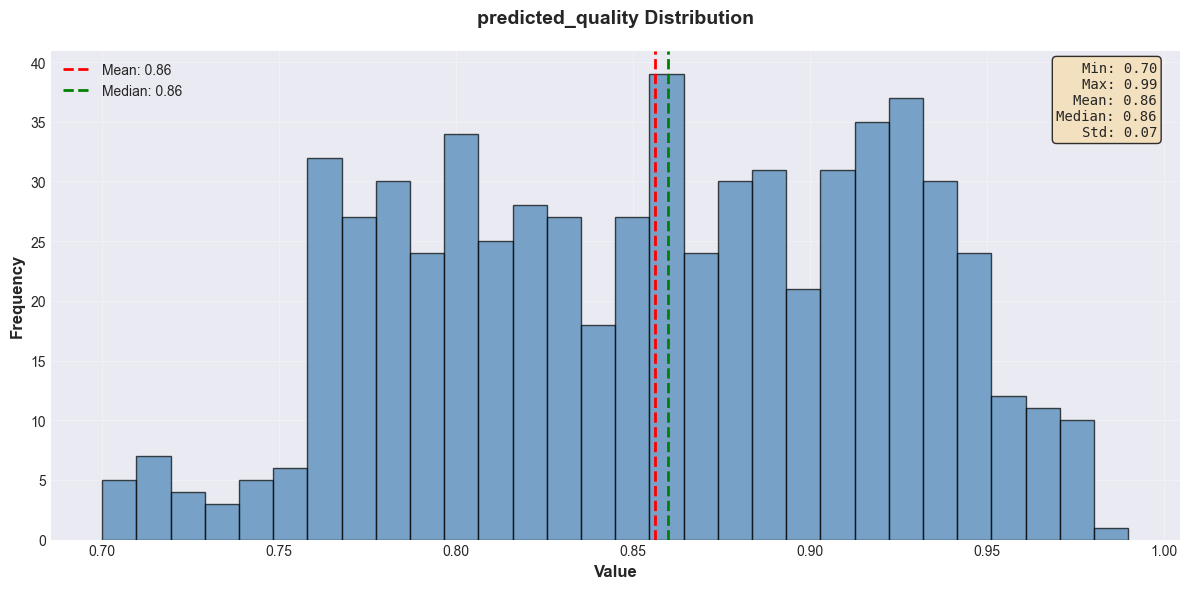

In [10]:
# predicted_quality
stats_quality = calculate_statistics(extracted_data['predicted_quality'], 
                                      'predicted_quality')
fig7 = plot_histogram(extracted_data['predicted_quality'], 
                      'predicted_quality', stats_quality, bins=30)
plt.show()


promotion 통계
최소값 (Min)           :            0
최대값 (Max)           :            1
평균 (Mean)           :         0.85
중앙값 (Median)        :         1.00
표준편차 (Std)          :         0.35
1사분위수 (Q1)          :         1.00
3사분위수 (Q3)          :         1.00


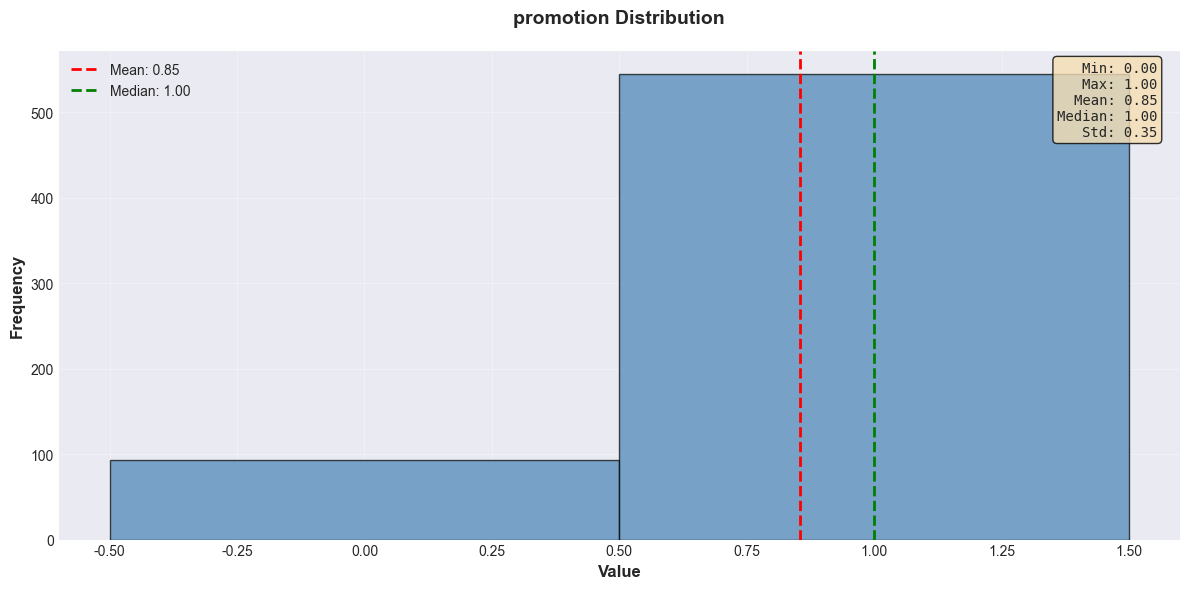

In [11]:
# promotion
stats_promo = calculate_statistics(extracted_data['promotion'], 
                                    'promotion')
fig8 = plot_histogram(extracted_data['promotion'], 
                      'promotion', stats_promo, bins=[-0.5, 0.5, 1.5])
plt.show()

## 4. Action 분석


action_t 통계
최소값 (Min)           :            0
최대값 (Max)           :            1
평균 (Mean)           :         0.60
중앙값 (Median)        :         1.00
표준편차 (Std)          :         0.49
1사분위수 (Q1)          :         0.00
3사분위수 (Q3)          :         1.00


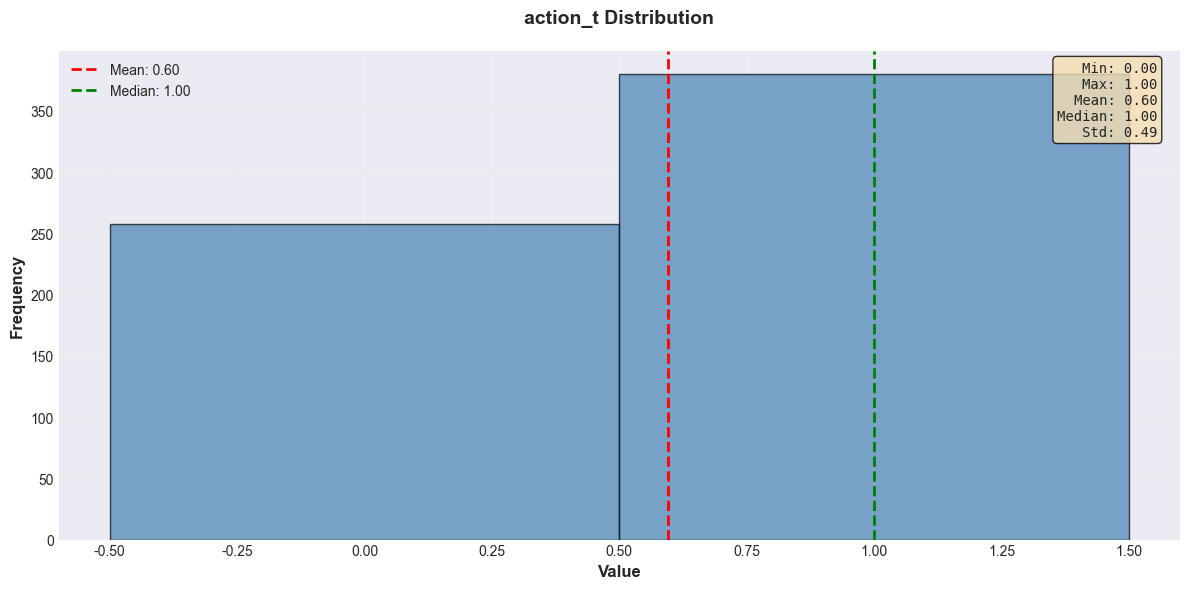

In [12]:
# action_t
stats_action = calculate_statistics(extracted_data['action_t'], 
                                     'action_t')
fig9 = plot_histogram(extracted_data['action_t'], 
                      'action_t', stats_action, bins=[-0.5, 0.5, 1.5])
plt.show()

## 5. Reward Ingredients 분석


clicked 통계
최소값 (Min)           :            0
최대값 (Max)           :            1
평균 (Mean)           :         0.60
중앙값 (Median)        :         1.00
표준편차 (Std)          :         0.49
1사분위수 (Q1)          :         0.00
3사분위수 (Q3)          :         1.00


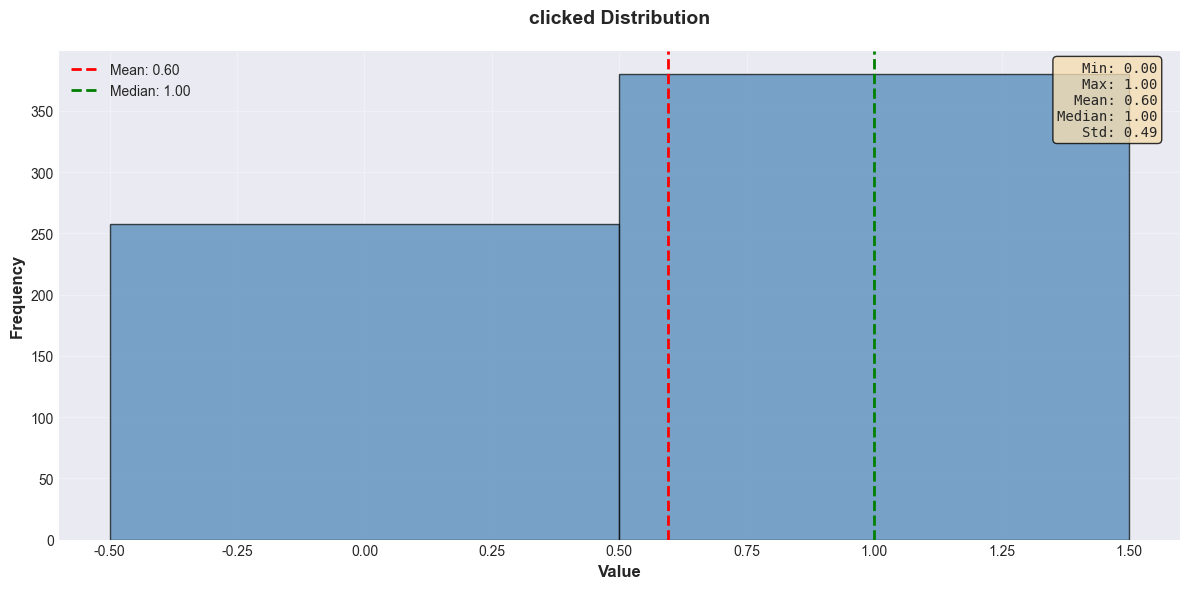

In [13]:
# clicked
stats_clicked = calculate_statistics(extracted_data['clicked'], 
                                      'clicked')
fig10 = plot_histogram(extracted_data['clicked'], 
                       'clicked', stats_clicked, bins=[-0.5, 0.5, 1.5])
plt.show()


page_view_time_sec 통계
최소값 (Min)           :            1
최대값 (Max)           :          120
평균 (Mean)           :        46.50
중앙값 (Median)        :        37.00
표준편차 (Std)          :        38.75
1사분위수 (Q1)          :        11.00
3사분위수 (Q3)          :        83.00


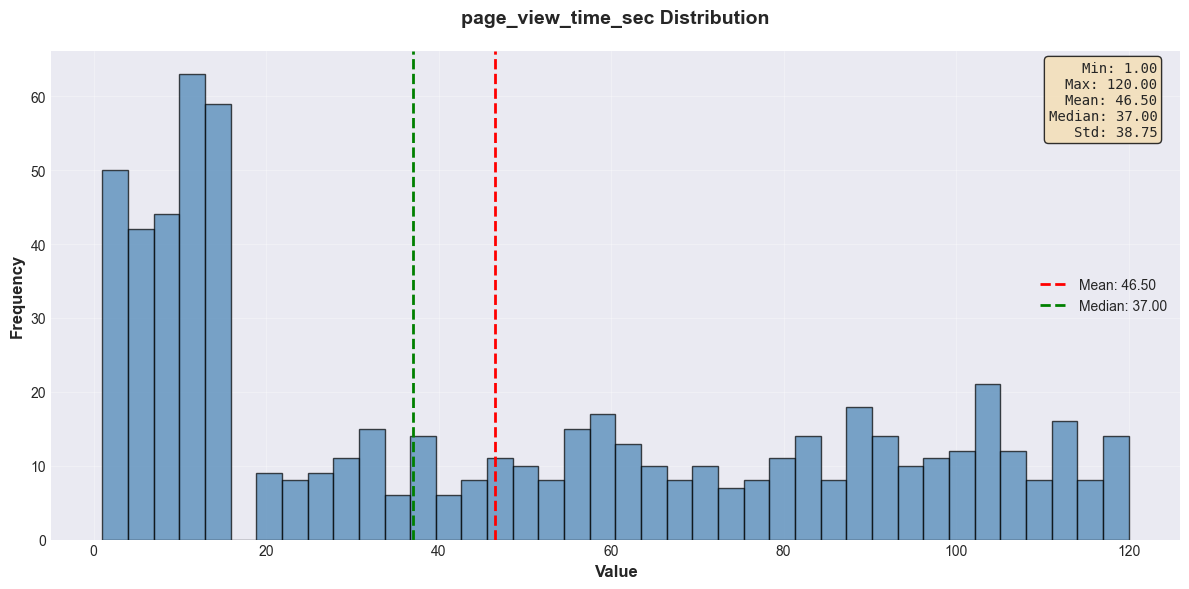

In [14]:
# page_view_time_sec
stats_page_time = calculate_statistics(extracted_data['page_view_time_sec'], 
                                        'page_view_time_sec')
fig11 = plot_histogram(extracted_data['page_view_time_sec'], 
                       'page_view_time_sec', stats_page_time, bins=40)
plt.show()


purchased 통계
최소값 (Min)           :            0
최대값 (Max)           :            1
평균 (Mean)           :         0.12
중앙값 (Median)        :         0.00
표준편차 (Std)          :         0.33
1사분위수 (Q1)          :         0.00
3사분위수 (Q3)          :         0.00


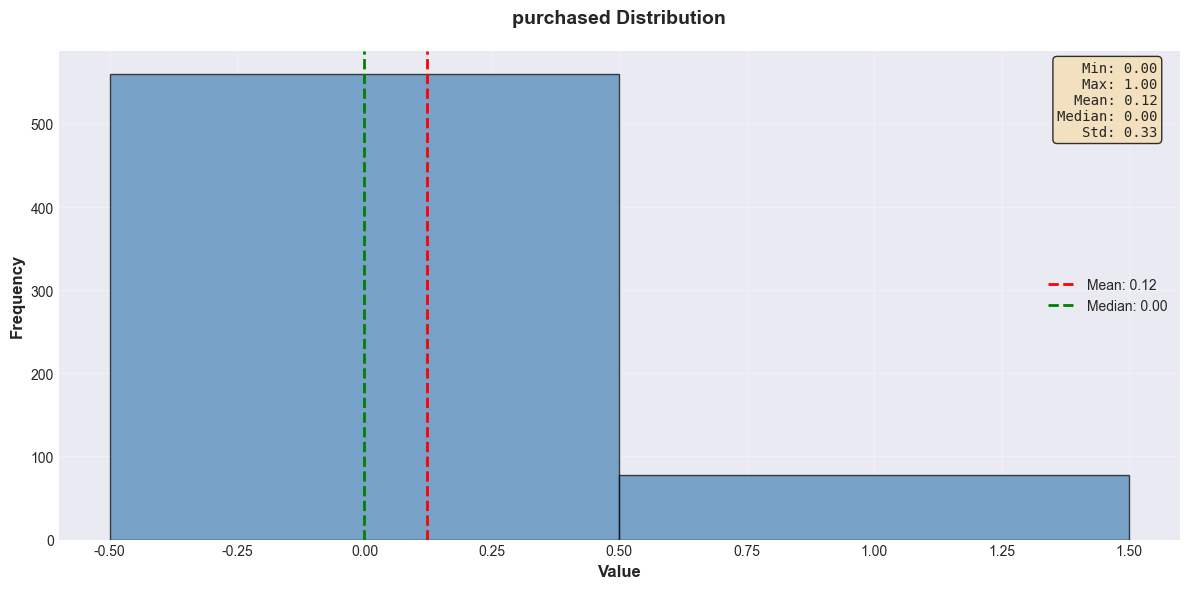

In [15]:
# purchased
stats_purchased = calculate_statistics(extracted_data['purchased'], 
                                        'purchased')
fig12 = plot_histogram(extracted_data['purchased'], 
                       'purchased', stats_purchased, bins=[-0.5, 0.5, 1.5])
plt.show()

## 6. 종합 요약 테이블

In [16]:
# 모든 통계를 DataFrame으로 정리
summary_data = {
    'Field': [],
    'Min': [],
    'Max': [],
    'Mean': [],
    'Median': [],
    'Std': []
}

all_stats = [
    ('user_group_vector[0]', stats_ugv0),
    ('user_group_vector[1]', stats_ugv1),
    ('session_click_count', stats_click),
    ('session_total_view_time', stats_view_time),
    ('predicted_price', stats_price),
    ('lead_time', stats_lead),
    ('predicted_quality', stats_quality),
    ('promotion', stats_promo),
    ('action_t', stats_action),
    ('clicked', stats_clicked),
    ('page_view_time_sec', stats_page_time),
    ('purchased', stats_purchased)
]

for field_name, stats in all_stats:
    summary_data['Field'].append(field_name)
    summary_data['Min'].append(stats['최소값 (Min)'])
    summary_data['Max'].append(stats['최대값 (Max)'])
    summary_data['Mean'].append(stats['평균 (Mean)'])
    summary_data['Median'].append(stats['중앙값 (Median)'])
    summary_data['Std'].append(stats['표준편차 (Std)'])

summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.round(2)

print("\n" + "="*80)
print("전체 통계 요약")
print("="*80)
print(summary_df.to_string(index=False))

# CSV로 저장
summary_df.to_csv('data_statistics_summary.csv', index=False)
print("\n통계 요약을 'data_statistics_summary.csv'에 저장했습니다.")


전체 통계 요약
                  Field    Min      Max     Mean   Median      Std
   user_group_vector[0]    0.0     1.00     0.57     1.00     0.49
   user_group_vector[1]    0.0     1.00     0.43     0.00     0.49
    session_click_count    0.0     7.00     1.86     1.00     1.70
session_total_view_time    0.0   561.00   145.28   115.00   133.50
        predicted_price 7200.0 64000.00 20994.36 18800.00 11252.69
              lead_time    1.0     5.00     3.06     3.00     1.41
      predicted_quality    0.7     0.99     0.86     0.86     0.07
              promotion    0.0     1.00     0.85     1.00     0.35
               action_t    0.0     1.00     0.60     1.00     0.49
                clicked    0.0     1.00     0.60     1.00     0.49
     page_view_time_sec    1.0   120.00    46.50    37.00    38.75
              purchased    0.0     1.00     0.12     0.00     0.33

통계 요약을 'data_statistics_summary.csv'에 저장했습니다.


## 7. 상관관계 분석 (보너스)

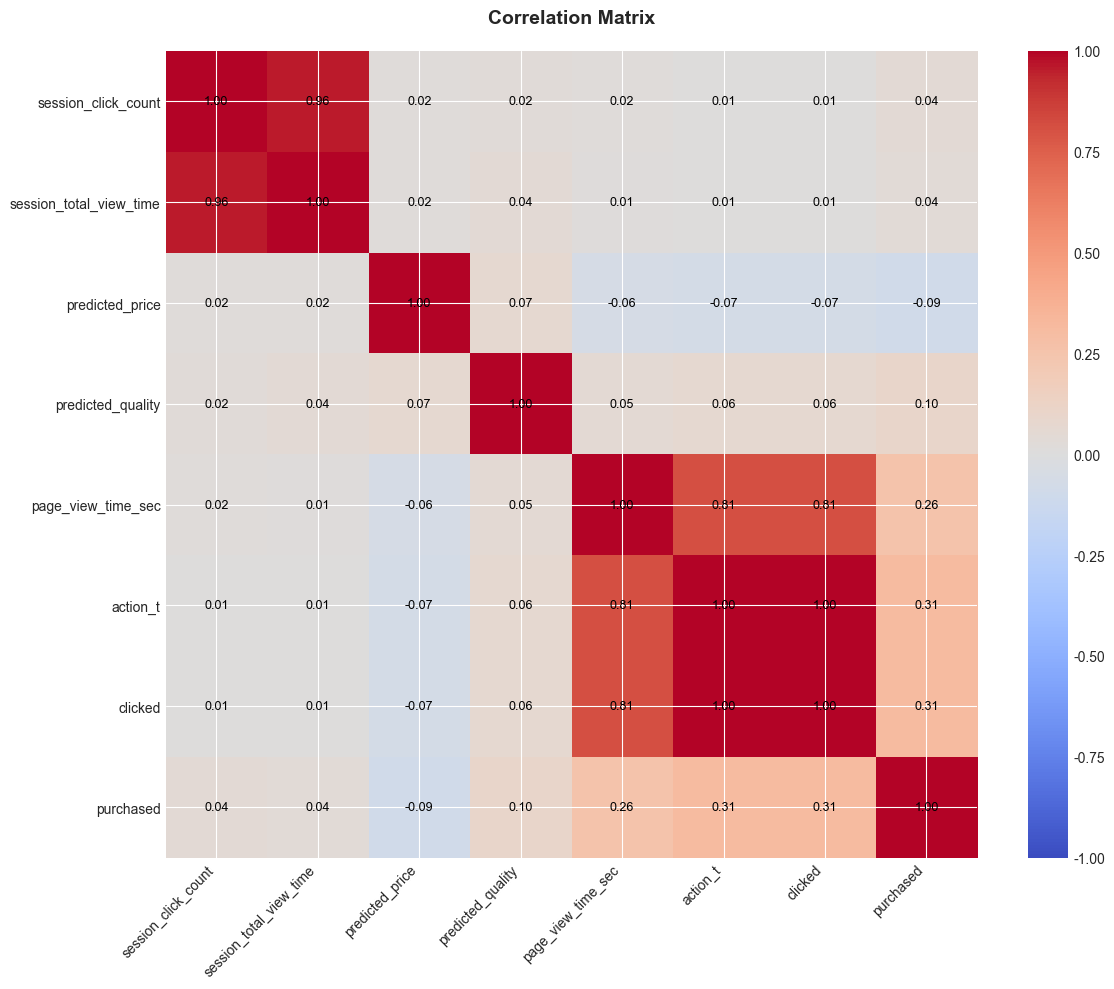


상관관계 행렬:
                         session_click_count  session_total_view_time  \
session_click_count                    1.000                    0.957   
session_total_view_time                0.957                    1.000   
predicted_price                        0.017                    0.016   
predicted_quality                      0.024                    0.041   
page_view_time_sec                     0.021                    0.009   
action_t                               0.006                    0.005   
clicked                                0.006                    0.005   
purchased                              0.040                    0.039   

                         predicted_price  predicted_quality  \
session_click_count                0.017              0.024   
session_total_view_time            0.016              0.041   
predicted_price                    1.000              0.068   
predicted_quality                  0.068              1.000   
page_view_time_se

In [17]:
# 연속형 변수들의 상관관계 분석
continuous_vars = {
    'session_click_count': extracted_data['session_click_count'],
    'session_total_view_time': extracted_data['session_total_view_time'],
    'predicted_price': extracted_data['predicted_price'],
    'predicted_quality': extracted_data['predicted_quality'],
    'page_view_time_sec': extracted_data['page_view_time_sec'],
    'action_t': extracted_data['action_t'],
    'clicked': extracted_data['clicked'],
    'purchased': extracted_data['purchased']
}

df_corr = pd.DataFrame(continuous_vars)
correlation_matrix = df_corr.corr()

# 상관관계 히트맵
fig, ax = plt.subplots(figsize=(12, 10))
im = ax.imshow(correlation_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)

# 틱 설정
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=45, ha='right')
ax.set_yticklabels(correlation_matrix.columns)

# 상관계수 표시
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = ax.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                      ha="center", va="center", color="black", fontsize=9)

ax.set_title('Correlation Matrix', fontsize=14, fontweight='bold', pad=20)
plt.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()

print("\n상관관계 행렬:")
print(correlation_matrix.round(3))

## 결론

이 노트북을 통해 dummy_data_100.json의 모든 주요 필드에 대한 통계와 분포를 확인할 수 있습니다.

### 주요 발견사항:
1. **User Groups**: 두 그룹(high_quality, low_price)이 균등하게 분포
2. **Session Metrics**: 클릭 수와 체류 시간이 세션 진행에 따라 누적
3. **Item Features**: 가격, 품질, 배송 시간의 다양한 분포
4. **Actions & Rewards**: 클릭률과 구매 전환율의 현실적인 패턴
5. **Correlations**: 변수 간의 관계 확인 (예: clicked와 purchased의 강한 상관관계)

이 데이터는 DQN 모델 학습에 적합한 구조와 분포를 가지고 있습니다.